# Data Science & Business Analytics Internship Task 6 (GRIP May-22)
# DataSet used: https://bit.ly/3kXTdox

# TASK 6 - Create the Decison Tree Classifier and visualize it graphically.
#          The purpose is if we feed only raw data to this classifier, it would be able to predict the right class accordingly.


# ---------------------------------------------------------------------------------------------

# Importing the required Libraries & Loading Iris Dataset

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pydot
from IPython.display import Image


from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

#  Loading Iris Dataset¶

In [2]:
# Loading dataset
iris = load_iris()
x = iris.data[:,:]
y = iris.target

In [3]:
data = pd.DataFrame(iris['data'], columns=["Petal Length",'Petal Width','Sepal Length','Sepal Width'])
data['Species'] = iris['target']
data['Species'] = data['Species'].apply(lambda x: iris['target_names'][x])
data.head(10)

,Petal Length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
# dataset elements from tail(last elements)
data.tail(5)

,Petal Length,Petal Width,Sepal Length,Sepal Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
# dataset shape in rows and columns, it indicates 150 rows and 5 columns
data.shape

(150, 5)

In [6]:
data.describe()

,Petal Length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# checking any null values in th dataset
data.isnull().sum()

Petal Length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

In [8]:
# It shows complete information regarding the dataset, column names, its null values, its datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal Length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data Visualization by compairing various features of the dataset

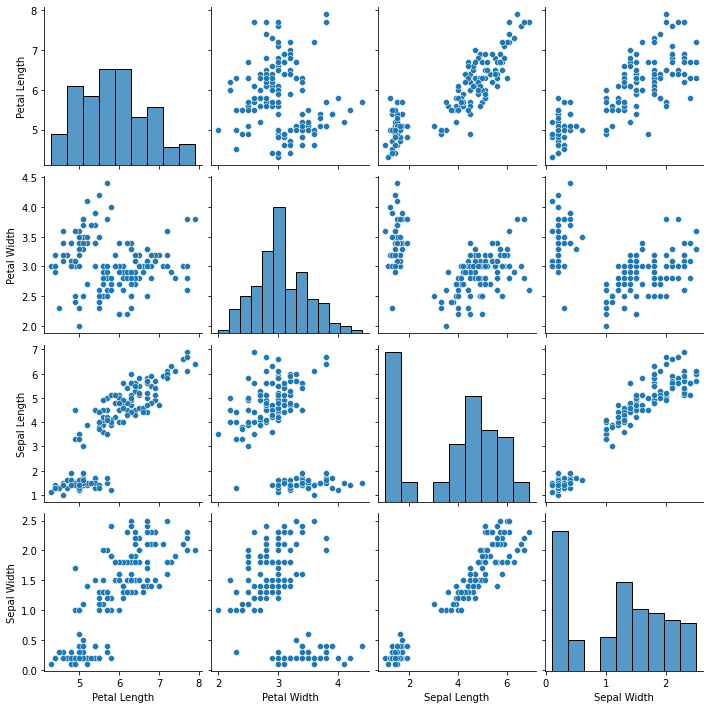

In [9]:
# using pairplot to display comparison between different columns int the dataset
sns.pairplot(data)

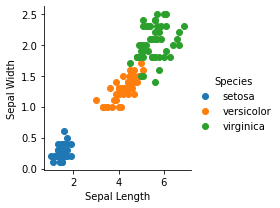

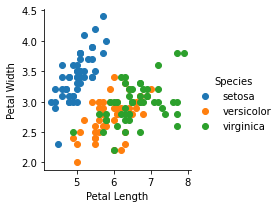

In [10]:
# Scatter plot of data based on Sepal Length and Sepal Width features
sns.FacetGrid(data, hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()

# Scatter plot of data based on Petal Length and Sepal Petal features
sns.FacetGrid(data, hue='Species',).map(plt.scatter,'Petal Length','Petal Width').add_legend()

plt.show()

<AxesSubplot:>

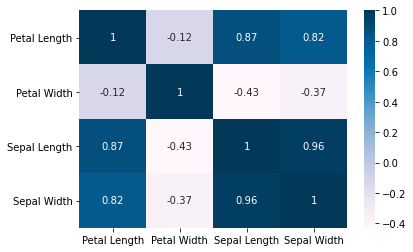

In [11]:
# Checking Correlation of the data
corr = data.corr()
sns.heatmap(corr, annot=True,cmap='PuBu')

# Now Implementing Decision tree Classifier

In [12]:
# Model training
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
classify_tree = DecisionTreeClassifier()
classify_tree.fit(X_train,y_train)
print("Training has been completed")
y_pred = classify_tree.predict(X_test)

Training has been completed


In [13]:
# Compairing the actual and Predicted Values of flower Classification
df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred})
df

,Actual Value,Predicted Value
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


# Visualization the Trained Model of the dataset

[Text(558.0, 747.4499999999999, 'Petal Width <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]\nclass = Versicolor'),
 Text(472.15384615384613, 611.55, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = Setosa'),
 Text(643.8461538461538, 611.55, 'Petal Width <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]\nclass = Versicolor'),
 Text(343.38461538461536, 475.65, 'Petal Length <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]\nclass = Versicolor'),
 Text(171.69230769230768, 339.74999999999994, 'Petal Width <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = Versicolor'),
 Text(85.84615384615384, 203.8499999999999, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Versicolor'),
 Text(257.53846153846155, 203.8499999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(515.0769230769231, 339.74999999999994, 'Petal Width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Virginica'),
 Text(429.23076923076917, 203

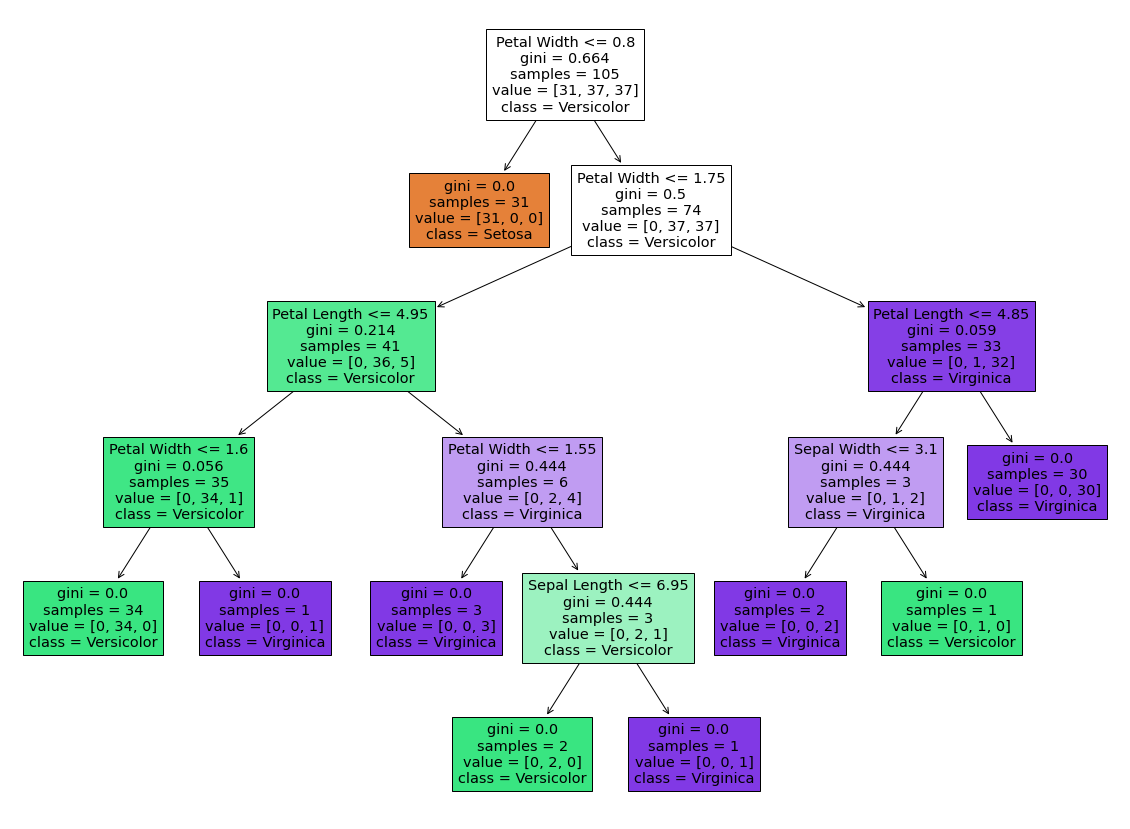

In [14]:
# Visualizations takes some features in consideration

from sklearn.tree import plot_tree
f_n = ['Sepal Length','Sepal Width','Petal Length','Petal Width']
c_n = ['Setosa','Versicolor','Virginica']
plt.figure(figsize=(20,15))
plot_tree(classify_tree,feature_names=f_n, class_names=c_n,filled=True)

In [15]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
print('Decision Tree Classifier Created Successfully')

Decision Tree Classifier Created Successfully


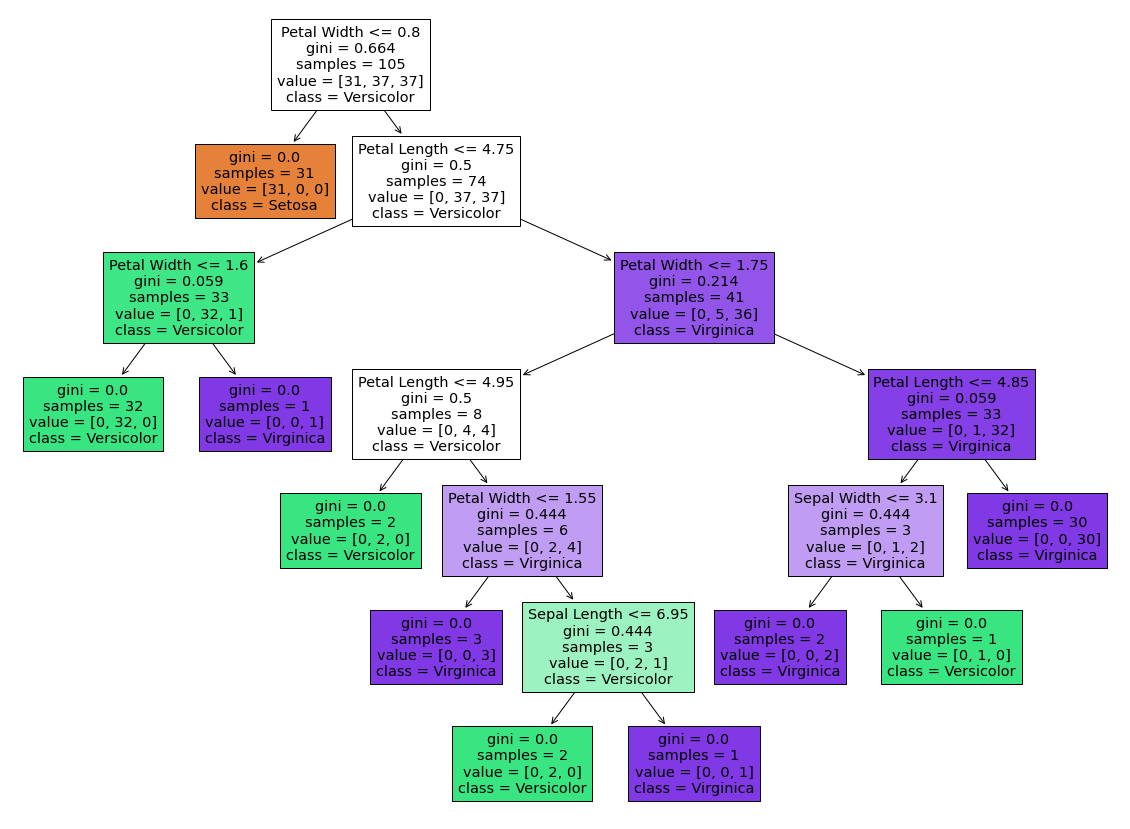

In [16]:
from sklearn import tree
plt.figure(figsize=(20,15))
tree = tree.plot_tree(dec_tree, feature_names = f_n, class_names=c_n,filled=True)

# Now Predicting the Class output for some random values of Sepal and Petal length and width

In [37]:
print('Class [0]    Class [1]      Class [2]')
print('Setosa','      Versicolor','    Virginica')

# Now Predicting Class Probability
print()
print('Predicting Class Probability for flower whose Petal Length and Sepal Length are 6.2cm and 1.5cm and sepal length and width are 3.8cm and 3.6cm.')
print()
out = classify_tree.predict([[6.2, 1.5, 3.8, 3.6]])
print('Output =',out)
print()
if(out == 0):
    print("Our model predicts the class as 0, that is, Setosa")
elif(out == 1):
    print("Our model predicts the class as 1 that is, Versicolor")
elif(out == 2):
    print("Our model predicts the class as 2 that is, Virginica")
          

Class [0]    Class [1]      Class [2]
Setosa       Versicolor     Virginica

Predicting Class Probability for flower whose Petal Length and Sepal Length are 6.2cm and 1.5cm and sepal length and width are 3.8cm and 3.6cm.

Output = [2]

Our model predicts the class as 2 that is, Virginica


# Lets check another Prediction  by providing random values

In [39]:
print('Class [0]    Class [1]      Class [2]')
print('Setosa','      Versicolor','    Virginica')

# Now Predicting Class Probability
print()
print('Predicting Class Probability for flower whose Petal Length and Sepal Length are 4.4cm and 3.2cm and sepal length and width are 1.4cm and 0.4cm.')
print()
out = classify_tree.predict([[4.4, 3.2, 1.4, 0.4]])
print('Output =',out)
print()
if(out == 0):
    print("Our model predicts the class as 0, that is, Setosa")
elif(out == 1):
    print("Our model predicts the class as 1 that is, Versicolor")
elif(out == 2):
    print("Our model predicts the class as 2 that is, Virginica")

Class [0]    Class [1]      Class [2]
Setosa       Versicolor     Virginica

Predicting Class Probability for flower whose Petal Length and Sepal Length are 4.4cm and 3.2cm and sepal length and width are 1.4cm and 0.4cm.

Output = [0]

Our model predicts the class as 0, that is, Setosa


# Calculating model Accuracy

In [40]:
# Model Accuracy
print("Accuracy is:",sm.accuracy_score(y_test, y_pred)*100,'%')

Accuracy is: 100.0 %


# Conclusion

# I have successfully carry-out prediction of an Iris Dataset using Decision Tree Algorithm and was able to evaluate the model's accuracy score which is comes out to be 100 %.


# Thank You